# Árbol de decisiones
Es una técnica predictiva que se puede utilizar tanto para predecir valores discretos (clasificación) o valores continuos (regresión).

Actualmente con scikit learn la entrada solo puede ser de valores numéricos.

El objetivo es crear particiones de la información (ramas) para predecir un valor (hoja).

El resultado de este modelo es una serie de reglas para particionar el espacion n-dimensional de entrada que puede ser facilmente implementable en un programa en forma de *if*s


In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Árboles  de decisión
from sklearn import tree  #Para un árbol de clasificación
from sklearn.tree import export_text #Para ver el árbol en modo texto.

## Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  #métricas de una regresión lineal
#from sklearn.datasets import load_iris

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,especie,descripcion_especie
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


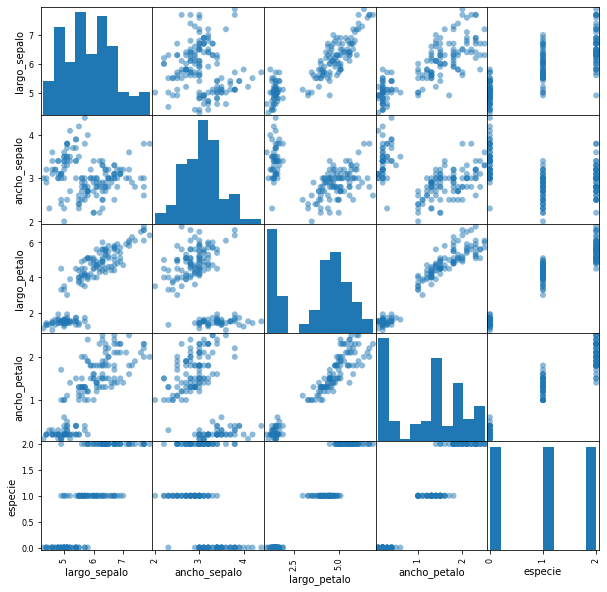

In [2]:
dfOriginal = pd.read_csv ("./datosEntrada/iris.csv");
cuantosRegistros = len(dfOriginal.index)  #Cuántos registros de procesarán (TODOS en este caso)
pd.plotting.scatter_matrix(dfOriginal,figsize=(10,10), marker="@");#,grid=True, diagonal="kde", alpha=0.8);
dfOriginal.corr()
dfOriginal

## Data set de iris
### Columnas
1. Largo del sépalo
2. Ancho del sépalo
3. Largo del pétalo
4. Ancho del pétalo
5. Especie (0 setosa, 1 versicolor, 2 virginica)
6. Nombre de la especie

<img src="./iris.png" style="height: 200px;"/>

##iris = load_iris()

##X, y = iris.data, iris.target
##print (y)
##iris.target_names

In [3]:
X = dfOriginal.iloc[ :  , [0,1,2,3]]   #Primeras 4 columnas (xs)
y = dfOriginal.iloc[ :  , [5]]   #Quinta columna (ys). Podría ser la sexta (texto)

In [4]:
#y[0]=4   # Cambiar luego un valor y ver cómo se genera una nueva clase y afecta al árbol completo

# Árbol de decisiones como clasificador (predice un valor discreto)
## Generación del modelo y entrenamiento con datos

In [5]:
arbol = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)  #árbol de decisiones como clasificador
arbol = arbol.fit(X, y)
arbol.classes_
#

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Visualización del árbol en modo texto

In [6]:
atributos = ["Largo del sépalo", "Ancho del sépalo", "Largo del pétalo","Ancho del pétalo"]  #Atributos 
r = export_text(arbol, feature_names=atributos)
print (r)   #Visualización del árbol como texto

|--- Largo del pétalo <= 2.45
|   |--- class: setosa
|--- Largo del pétalo >  2.45
|   |--- Ancho del pétalo <= 1.75
|   |   |--- Largo del pétalo <= 4.95
|   |   |   |--- Largo del sépalo <= 5.15
|   |   |   |   |--- class: versicolor
|   |   |   |--- Largo del sépalo >  5.15
|   |   |   |   |--- class: versicolor
|   |   |--- Largo del pétalo >  4.95
|   |   |   |--- class: virginica
|   |--- Ancho del pétalo >  1.75
|   |   |--- Largo del pétalo <= 4.95
|   |   |   |--- class: virginica
|   |   |--- Largo del pétalo >  4.95
|   |   |   |--- class: virginica



## Visualización del árbol como imagen
Cada nodo particiona los datos de entrada en nuevas ramas. Al final se tienen las hojas con la clase predicha
### Nodo
1. Condición de partición sobre la entrada X. **Cuando se trata de una hoja no se tiene este campo (ya no se van a subdividir)**
2. *Gini* $[0, 1]$: 0 es que todos los casos que tienen la condición (1) reales se fueron por esta división
3. *samples*  Cuántos casos entran al nodo
4. *value* = [$n_1, n_2, ..., n_n$] Cuántos casos hay de cada clase

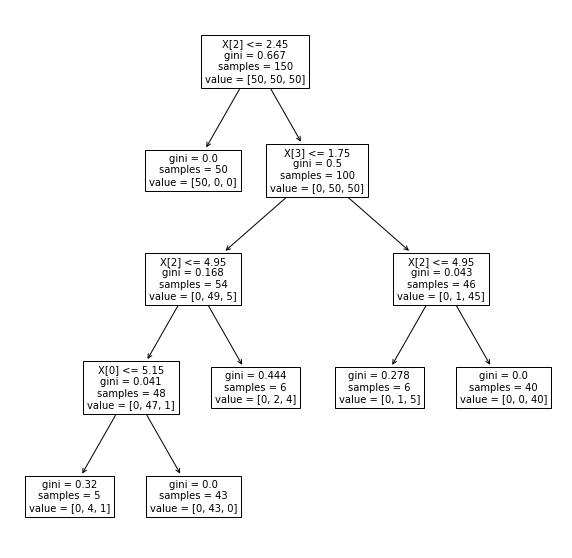

In [7]:
plt.figure(figsize=(10,10))  # dimensiones en pulgadas (probar)
tree.plot_tree(arbol, fontsize=10)
plt.show()

## Predicción con nuevo conjunto de datos
Se puede cargar un nuevo data frame y calcular la clase que podría tener.


In [8]:
# Carga de nuevos datos
dfNuevo = pd.read_csv ("./datosEntrada/iris_predict.csv");
dfNuevo

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo
0,5.1,3.5,1.4,0.2
1,5.1,3.0,1.4,0.2
2,5.1,2.5,3.0,1.1
3,5.7,3.0,4.0,1.3
4,6.3,3.3,6.0,2.5
5,5.8,2.7,5.0,1.9


In [9]:
# Predicción con el modelo generado previamente
prediccion = arbol.predict(dfNuevo)

print (prediccion)

dfNuevo["prediccion"]=prediccion
dfNuevo

['setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica']


,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,prediccion
0,5.1,3.5,1.4,0.2,setosa
1,5.1,3.0,1.4,0.2,setosa
2,5.1,2.5,3.0,1.1,versicolor
3,5.7,3.0,4.0,1.3,versicolor
4,6.3,3.3,6.0,2.5,virginica
5,5.8,2.7,5.0,1.9,virginica


In [10]:
import datetime as dt
print ("Fin del proceso del árbol de clasificación", dt.datetime.today())

Fin del proceso del árbol de clasificación 2021-12-10 22:56:33.582741


# Árbol de decisiones para regresión (predice un valor continuo)
## Carga de datos
## Generación del modelo y entrenamiento con datos

,x,y
x,1.000000,-0.009087
y,-0.009087,1.000000


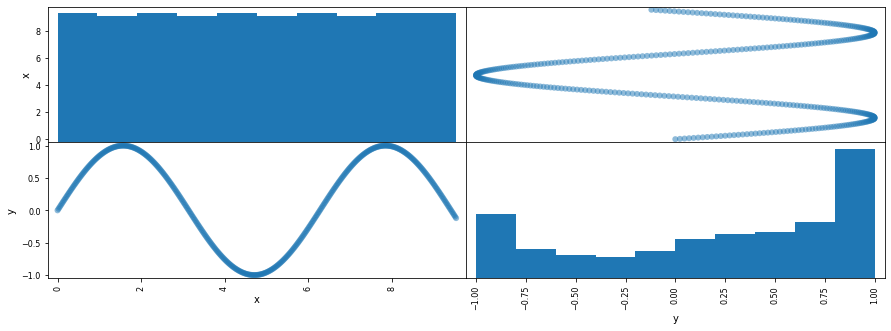

In [11]:
dfRegresion = pd.read_csv ("./datosEntrada/senoidal.csv");
nTamanoBloque=7
#dfRegresion = pd.read_csv ("./datosEntrada/casosxPeriodo_"+str(nTamanoBloque)+"_Dias.csv");

pd.plotting.scatter_matrix(dfRegresion,figsize=(15,5), marker="@");#,grid=True, diagonal="kde", alpha=0.8);
dfRegresion.corr()

In [12]:
X = dfRegresion.iloc[ :  , [0]]   #Primera columna (xs)
y = dfRegresion.iloc[ :  , [1]]   #Segunda columna (ys)

## Entrenamiento del árbol de regresión

In [13]:
arbol = tree.DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)  #árbol de decisiones como clasificador
# max_depth Es la profundidad máxima del árbol
# min_samples_leaf Número de casos, como mínimo, en una hoja para considerarla como tal
arbol = arbol.fit(X, y)

In [14]:
atributos = ["x"]  #Atributos 
r = export_text(arbol, feature_names=atributos)
print (r)   #Visualización del árbol como texto

|--- x <= 2.79
|   |--- x <= 0.56
|   |   |--- x <= 0.26
|   |   |   |--- value: [0.13]
|   |   |--- x >  0.26
|   |   |   |--- value: [0.40]
|   |--- x >  0.56
|   |   |--- x <= 2.38
|   |   |   |--- value: [0.86]
|   |   |--- x >  2.38
|   |   |   |--- value: [0.52]
|--- x >  2.79
|   |--- x <= 6.31
|   |   |--- x <= 3.48
|   |   |   |--- value: [0.00]
|   |   |--- x >  3.48
|   |   |   |--- value: [-0.69]
|   |--- x >  6.31
|   |   |--- x <= 8.98
|   |   |   |--- value: [0.71]
|   |   |--- x >  8.98
|   |   |   |--- value: [0.15]



## Graficación

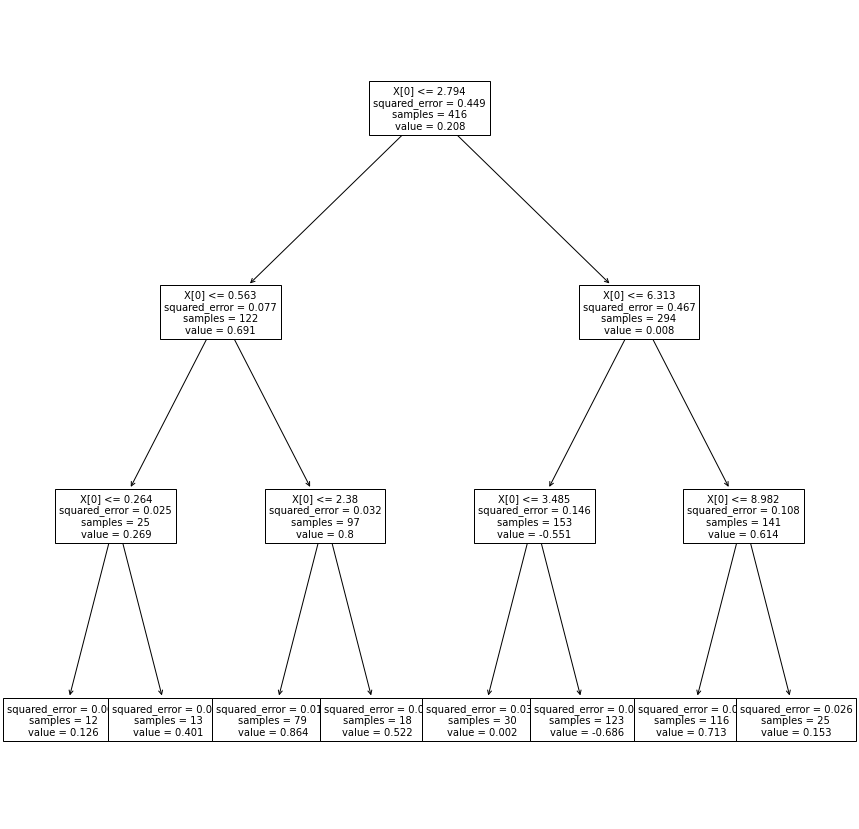

In [15]:
plt.figure(figsize=(15,15))  # dimensiones en pulgadas (probar)
tree.plot_tree(arbol, fontsize=10)
plt.show()

In [16]:
# Predicción con el modelo generado previamente
yPredicha = arbol.predict(X) #Probamos con los mismos datos, pero podrían ser otros

#print (yPredicha)

### Métricas
Las mismas que usamos, por ejemplo, con la regresión lineal (en ambas se calcula la variación de la y real con la y calculada)

In [17]:
mse = mean_squared_error(y, yPredicha)   #El cuadrado de la unidad de medida
rmse= mse ** (1/2)
mae = mean_absolute_error(y, yPredicha)
R2  = r2_score(y, yPredicha)
print ("Media aritmética", yPredicha.mean())
print ()
print ("MSE =",mse, "unidades cuadradas")
print ("RMSE=",  rmse)
print ("MAE =",mae)
print ()
print ("R^2=",R2)
yPredicha;

Media aritmética 0.20812238250240372

MSE = 0.05111497204620013 unidades cuadradas
RMSE= 0.22608620490025508
MAE = 0.18049235709670683

R^2= 0.8862289855878923


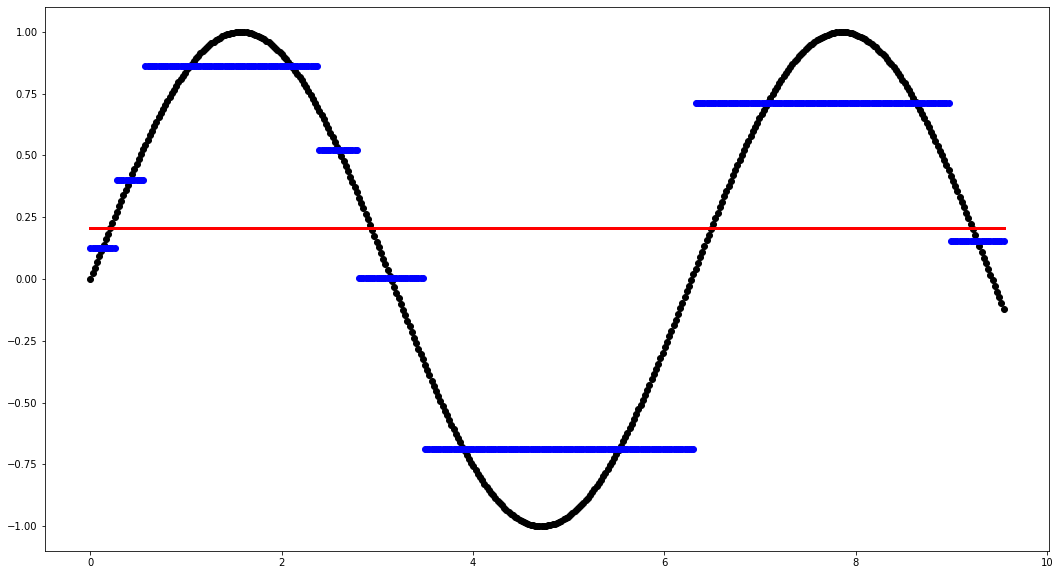

In [18]:
plt.figure (num=1, figsize=(18,10))
#1 es un identificador (ID)

desplazamiento=0
plt.scatter(X+desplazamiento, y,  color='black') # Diagrama de dispersión

plt.scatter(X, yPredicha, color='blue') #Diagrama de dispersión

media = np.full(len(yPredicha),yPredicha.mean()) #serie que repite la media n veces (así parece una línea)
plt.plot(X, media, color="red", linewidth=3)   #Media
